Training shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


c:\Users\avinash\Downloads\my projects\Deep learning\tf-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8111 - loss: 0.7217
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9117 - loss: 0.3128
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9211 - loss: 0.2856
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9239 - loss: 0.2696
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9266 - loss: 0.2643
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9119 - loss: 0.3059
Test Accuracy: 0.9243999719619751
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label: 7
Actual label: 7


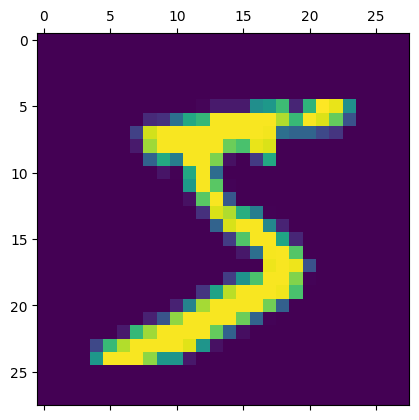

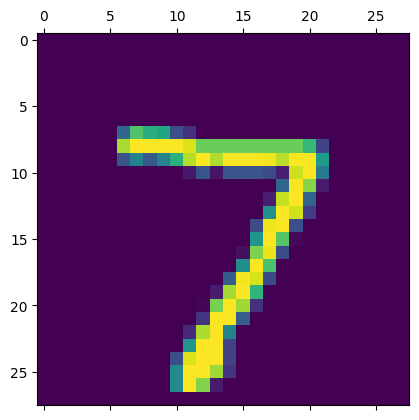

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Check shapes
print("Training shape:", x_train.shape)
print("Test shape:", x_test.shape)

# Visualize an image
plt.matshow(x_train[0])

# Normalize pixel values (Only for x_train)
x_train = x_train / 255.0
x_test = x_test / 255.0  # Also normalize test data

# Flatten the image data
x_train_flat = x_train.reshape(len(x_train), 28*28)
x_test_flat = x_test.reshape(len(x_test), 28*28)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train_flat, y_train, epochs=5)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test)
print("Test Accuracy:", test_accuracy)

# Visualize a test image
plt.matshow(x_test[0])

# Predict on test data
predictions = model.predict(x_test_flat)

# Print predicted and actual value for first test image
print("Predicted label:", np.argmax(predictions[0]))
print("Actual label:", y_test[0])


In [2]:
model.evaluate(x_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9119 - loss: 0.3059


[0.27287614345550537, 0.9243999719619751]

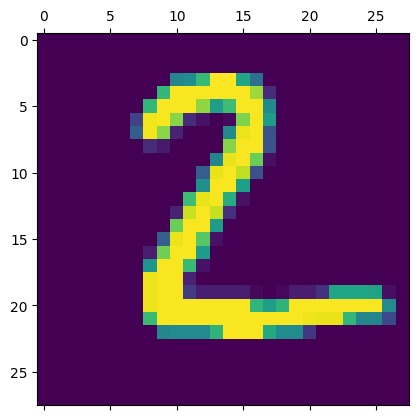

In [3]:
plt.matshow(x_test[1])

In [4]:
prediction = model.predict(x_test_flat)
prediction[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([1.7421821e-02, 1.7018495e-07, 2.6705377e-02, 9.4307035e-01,
       1.5285180e-03, 9.1708548e-02, 8.4281226e-07, 9.9962348e-01,
       6.5074533e-02, 5.1719695e-01], dtype=float32)

In [5]:
np.argmax(prediction[1])

np.int64(2)

In [6]:
pred = [np.argmax(i) for i in prediction]
pred[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [7]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [8]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=pred)

In [9]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    0,    2,    0,    5,    2,    2,    2,    0],
       [   0, 1102,    3,    2,    1,    2,    4,    2,   19,    0],
       [   9,    6,  913,   17,   12,    5,   10,   11,   46,    3],
       [   4,    0,   16,  913,    1,   32,    1,   11,   26,    6],
       [   2,    1,    4,    1,  932,    0,    6,    3,   10,   23],
       [  10,    2,    3,   19,   10,  800,    9,    4,   30,    5],
       [  14,    3,    7,    1,    9,   26,  894,    2,    2,    0],
       [   1,    5,   20,    7,    9,    1,    0,  947,    4,   34],
       [   8,    4,    6,   16,    9,   31,    8,   11,  876,    5],
       [  11,    4,    1,   11,   39,   10,    0,   25,    8,  900]],
      dtype=int32)>

In [10]:
!pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


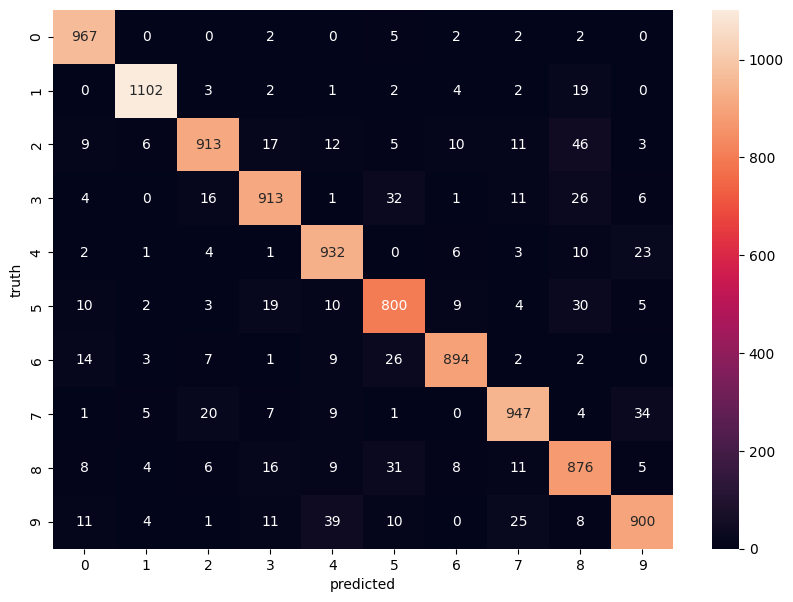

In [11]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

In [12]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10,  activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train_flat, y_train, epochs=5)

c:\Users\avinash\Downloads\my projects\Deep learning\tf-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8766 - loss: 0.4469
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9603 - loss: 0.1337
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9746 - loss: 0.0883
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9790 - loss: 0.0677
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9850 - loss: 0.0511


In [13]:
model.evaluate(x_test_flat, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9730 - loss: 0.0892


[0.07400002330541611, 0.977400004863739]

In [14]:
prediction = model.predict(x_test_flat)
prediction[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([3.3196498e-02, 8.3957141e-04, 5.6254113e-01, 9.9672270e-01,
       1.0814585e-06, 1.7357647e-02, 9.1640992e-08, 9.9997061e-01,
       2.2577170e-01, 5.1052749e-01], dtype=float32)

In [15]:
np.argmax(prediction[1])

np.int64(2)

In [16]:
pred = [np.argmax(i) for i in prediction]
pred[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [17]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [18]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=pred)

In [19]:
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    1,    1,    0,    1,    0,    5,    1,    3,    2],
       [   0, 1125,    3,    1,    0,    1,    2,    0,    3,    0],
       [   1,    2, 1014,    3,    2,    0,    2,    4,    4,    0],
       [   0,    0,    2,  992,    0,    4,    0,    4,    4,    4],
       [   0,    0,    3,    0,  950,    0,    5,    2,    5,   17],
       [   2,    1,    0,   13,    0,  862,    6,    1,    5,    2],
       [   3,    3,    1,    1,    1,    3,  941,    1,    4,    0],
       [   0,    6,    6,    7,    0,    0,    0,  994,    3,   12],
       [   3,    0,    2,   10,    1,    1,    2,    4,  948,    3],
       [   1,    3,    0,    8,    5,    1,    1,    3,    5,  982]],
      dtype=int32)>

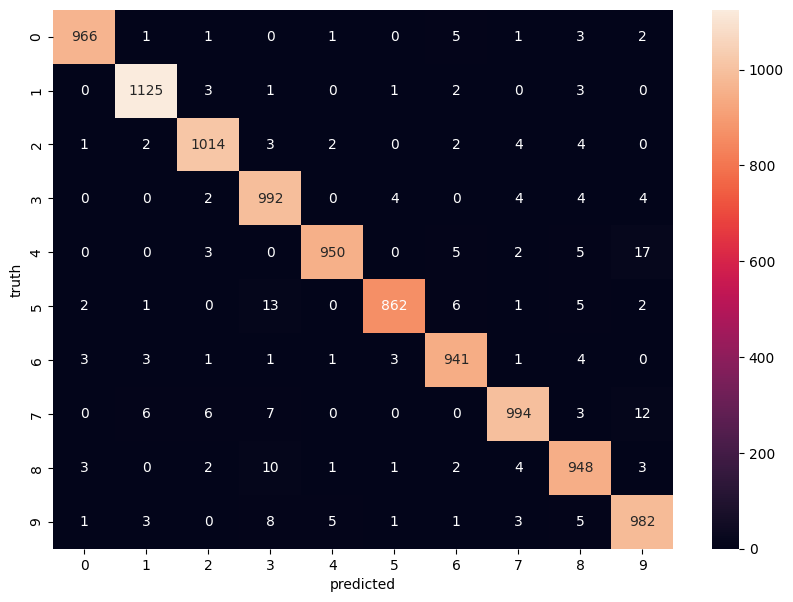

In [20]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')
plt.show()

In [45]:
import os
import datetime
from tensorboard import program
log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10,  activation='sigmoid')
])

# Compile the model
tb_call = tf.keras.callbacks.TensorBoard(log_dir= 'logs/', histogram_freq=1)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(x_train, y_train, epochs=5, callbacks=[tb_call])
tb = program.TensorBoard()
tb.configure(argv=[None, f'--logdir={log_dir}'])
url = tb.launch()
print(f"TensorBoard running at: {url}")

c:\Users\avinash\Downloads\my projects\Deep learning\tf-env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8716 - loss: 0.4490
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9598 - loss: 0.1364
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9733 - loss: 0.0895
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9813 - loss: 0.0642
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9829 - loss: 0.0537
TensorBoard running at: http://localhost:6007/


In [32]:
!pip install tensorboard


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import tensorboard
print(tensorboard.__version__)


2.19.0


In [44]:
import os
import tensorboard
from tensorboard import program

tb = program.TensorBoard()
logdir = "logs/"
tb.configure(argv=[None, '--logdir', logdir])
url = tb.launch()
print(f"TensorBoard running at: {url}")


TensorBoard running at: http://localhost:6006/


In [22]:
!pip install ipywidgets


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
!pip install PIL

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
!pip install pillow


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import ipywidgets as widgets           # For the upload button
from IPython.display import display    # To display the widget
from PIL import Image                  # To handle image processing
import io                              # To read uploaded bytes
import numpy as np
import matplotlib.pyplot as plt



In [26]:
upload  = widgets.FileUpload(accept = '.png, .jpg, .jpeg', multiple = False)
display(upload)

FileUpload(value=(), accept='.png, .jpg, .jpeg', description='Upload')

In [27]:
import io
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Get uploaded image content
file_info = upload.value[0]
image_data = file_info['content']

# Open and preprocess image
img = Image.open(io.BytesIO(image_data)).convert("L")
img = img.resize((28, 28))

# Convert to numpy array and normalize
img_array = np.array(img) / 255.0

# Invert if background is white (MNIST has white digits on black background)
if np.mean(img_array) > 0.5:
    img_array = 1 - img_array

# Reshape for CNN input: (batch, height, width, channels)
img_array = img_array.reshape(1, 28, 28, 1)

# Predict using model
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction[0])

# Display result
plt.imshow(img_array.squeeze(), cmap='gray')  # remove batch and channel dims
plt.title(f"Predicted Label: {predicted_label}")
plt.axis("off")
plt.show()


IndexError: tuple index out of range